# Question

You are consulting for Company XYZ which has provided you with a performance summary with some of their loan performance summarized by merchant. Every merchant is paying a 2% MDR (merchant discount rate) to Company XYZ for each transaction

* Based on the data, which categories generate the most profit for Company XYZ?


* What merchant pricing strategy will you come out to increase/decrease MDR for better overall profitability? You can use public information as well, if needed.

## Step 1 : Read Files

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
performance = spark.read.csv("/FileStore/tables/performance_dataset.csv", header = True, inferSchema = True).toPandas()
category = spark.read.csv("/FileStore/tables/merchant_category_mapping.csv", header = True, inferSchema = True).toPandas()
merchant = spark.read.csv("/FileStore/tables/merchant_name_mapping.csv", header = True, inferSchema = True).toPandas()

## Step 2: EDA

#### Performance data

In [0]:
performance.head(5)

,merchant_id,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
0,78986,0.927466,0.948425,6331,491.650278,473.727737,643,8,0.251198
1,54871,0.983798,0.978641,3293,862.996710,862.555109,715,6,0.000000
2,86469,0.936782,0.965042,2670,636.689936,620.229734,664,8,0.214657
3,42719,0.961743,0.945634,570,719.714054,692.877934,655,10,0.257577
4,40242,0.867273,0.902408,317,380.978427,374.832065,626,9,0.160714


In [0]:
performance.info()
print("There are" ,performance.duplicated().sum(), "duplicated record(s)")
print("There are", performance['merchant_id'].nunique(),"unique merchant_id")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   merchant_id              143 non-null    int32  
 1   actual_repayment_pct     143 non-null    float64
 2   predicted_repayment_pct  143 non-null    float64
 3   num_trxn                 143 non-null    int32  
 4   avg_auth_amt             143 non-null    float64
 5   avg_loan_amt             143 non-null    float64
 6   avg_fico                 143 non-null    int32  
 7   avg_term                 143 non-null    int32  
 8   avg_apr                  143 non-null    float64
dtypes: float64(5), int32(4)
memory usage: 7.9 KB
There are 0 duplicated record(s)
There are 143 unique merchant_id


In [0]:
performance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
merchant_id,143.0,51642.608392,24508.470107,11801.000000,29283.500000,51182.000000,72118.500000,99898.000000
actual_repayment_pct,143.0,0.915635,0.166605,0.000000,0.885070,0.976093,1.000000,1.000000
predicted_repayment_pct,143.0,0.938986,0.042875,0.707895,0.932296,0.949765,0.963021,0.989278
num_trxn,143.0,120.258741,633.062161,1.000000,3.000000,8.000000,32.500000,6331.000000
avg_auth_amt,143.0,1127.141393,1138.127493,79.840000,407.905850,843.750000,1432.083563,8673.500000
avg_loan_amt,143.0,1054.581982,1017.087293,79.840000,400.360792,823.333333,1325.176389,6928.500000
avg_fico,143.0,659.601399,33.496508,560.000000,640.000000,658.000000,678.500000,768.000000
avg_term,143.0,9.244755,1.862214,3.000000,8.500000,9.000000,10.000000,12.000000
avg_apr,143.0,0.232849,0.064984,0.000000,0.233514,0.250000,0.261597,0.300000


#### Merchant Data

In [0]:
merchant.info()
print("There are" ,merchant.duplicated().sum(), "duplicated record(s)")
print("There are", merchant['merchant_id'].nunique(),"unique merchant_id")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         143 non-null    object
 1   merchant_id  143 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.8+ KB
There are 0 duplicated record(s)
There are 143 unique merchant_id


### Join Performance and Merchant DF together

In [0]:
# check all the merchant_id in the performance table is valid in the merchant_table
values = set(merchant['merchant_id'])
performance['merchant_id'].isin(values).astype(int).sum()

Out[458]: 143

In [0]:
df = pd.merge(merchant, performance, on = ['merchant_id'])
df

,name,merchant_id,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
0,UCXMYZC,42733,0.307185,0.792512,5,220.324444,216.992222,598,9,0.300000
1,OQFYEDO,28833,0.927789,0.896600,36,684.068666,632.780166,645,10,0.273365
2,LVMCHQE,83007,0.799825,0.935678,44,752.930568,742.344659,653,9,0.259755
3,QIGSCCQ,66431,0.882855,0.936932,71,595.632391,588.272826,644,10,0.251269
4,DCZPIEU,61453,0.731343,0.963096,8,855.211333,835.478666,640,11,0.245666
...,...,...,...,...,...,...,...,...,...,...
138,YGPAISR,92660,1.000000,0.939815,2,250.750000,250.750000,649,12,0.287777
139,CCGBOVT,53435,0.874031,0.972540,8,1088.452000,988.725000,675,10,0.240663
140,KAQBHHB,14754,0.870808,0.943917,142,407.861701,396.634793,630,7,0.268265
141,WHOJNDV,73545,1.000000,0.949046,1,1337.870000,1337.870000,640,12,0.300000


#### calculate some metrics
* Revenue
  
  - Consumer interest revenue
    * formula
      
      \\(r = APR  /  12 \\)
      
      \\(Total = (principle  *  r * (1+r) ^ n /   (1+r)^n -1) * n \\)
  - Merchant Discount Rate Revenue

* Cost
  
  - Default Revenue
  - Funding Cost (since we do not have funding cost, let's assume the funding rate is 0% for simplicity)
        
* P = R - C

In [0]:
def avg_consumer_loan_revenue_calculation(df):
  r = df['avg_apr']/12
  principle = df['avg_loan_amt']
  n = df['avg_term']
  if r !=0:
    A = (principle *r* (1+r)**(n) / ((1+r)**(n) -1 )) * n
  else:
    A = principle
  return A * df['actual_repayment_pct']

# calculate some ratios
df['predicted_default_rate'] = 1-df['predicted_repayment_pct']
df['actual_default_rate'] = 1-df['actual_repayment_pct']
df['repayment_pct_diff'] = df['predicted_repayment_pct'] - df['actual_repayment_pct']
df['% loan used'] = df['avg_loan_amt'] / df['avg_auth_amt']


# 
df['consumer_net_revenue'] = (df.apply(avg_consumer_loan_revenue_calculation, axis = 1)-df['avg_loan_amt']) * df['num_trxn']
df['merchant_total_transactions'] = df['num_trxn'] * df['avg_loan_amt']
df['merchant_discount_revenue'] = df['num_trxn'] * df['avg_loan_amt'] * 0.02
df['Profit'] = df['consumer_net_revenue'] + df['merchant_discount_revenue']
df['loss'] = np.where(df['Profit'] <0, 1,0)
df


,name,merchant_id,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr,predicted_default_rate,actual_default_rate,repayment_pct_diff,% loan used,consumer_net_revenue,merchant_total_transactions,merchant_discount_revenue,Profit,loss
0,UCXMYZC,42733,0.307185,0.792512,5,220.324444,216.992222,598,9,0.300000,0.207488,0.692815,0.485327,0.984876,-708.646125,1084.961110,21.699222,-686.946902,1
1,OQFYEDO,28833,0.927789,0.896600,36,684.068666,632.780166,645,10,0.273365,0.103400,0.072211,-0.031190,0.925024,1092.496180,22780.085976,455.601720,1548.097899,0
2,LVMCHQE,83007,0.799825,0.935678,44,752.930568,742.344659,653,9,0.259755,0.064322,0.200175,0.135853,0.985940,-3630.150338,32663.164996,653.263300,-2976.887038,1
3,QIGSCCQ,66431,0.882855,0.936932,71,595.632391,588.272826,644,10,0.251269,0.063068,0.117145,0.054077,0.987644,-514.279306,41767.370646,835.347413,321.068106,0
4,DCZPIEU,61453,0.731343,0.963096,8,855.211333,835.478666,640,11,0.245666,0.036904,0.268657,0.231753,0.976927,-1174.967119,6683.829328,133.676587,-1041.290533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,YGPAISR,92660,1.000000,0.939815,2,250.750000,250.750000,649,12,0.287777,0.060185,0.000000,-0.060185,1.000000,81.565225,501.500000,10.030000,91.595225,0
139,CCGBOVT,53435,0.874031,0.972540,8,1088.452000,988.725000,675,10,0.240663,0.027460,0.125969,0.098509,0.908377,-211.117909,7909.800000,158.196000,-52.921909,1
140,KAQBHHB,14754,0.870808,0.943917,142,407.861701,396.634793,630,7,0.268265,0.056083,0.129192,0.073108,0.972474,-2793.669301,56322.140606,1126.442812,-1667.226489,1
141,WHOJNDV,73545,1.000000,0.949046,1,1337.870000,1337.870000,640,12,0.300000,0.050954,0.000000,-0.050954,1.000000,227.231231,1337.870000,26.757400,253.988631,0


In [0]:
df.iloc[df['Profit'].idxmax()]

Out[461]: name                                MYRIFGH
merchant_id                           78986
actual_repayment_pct               0.927466
predicted_repayment_pct            0.948425
num_trxn                               6331
avg_auth_amt                     491.650278
avg_loan_amt                     473.727737
avg_fico                                643
avg_term                                  8
avg_apr                            0.251198
predicted_default_rate             0.051575
actual_default_rate                0.072534
repayment_pct_diff                 0.020959
% loan used                        0.963546
consumer_net_revenue           50815.893839
merchant_discount_revenue      59983.406059
Profit                        110799.299897
consumer_profit_percentage          0.45863
merchant_profit_percentage          0.54137
Name: 137, dtype: object

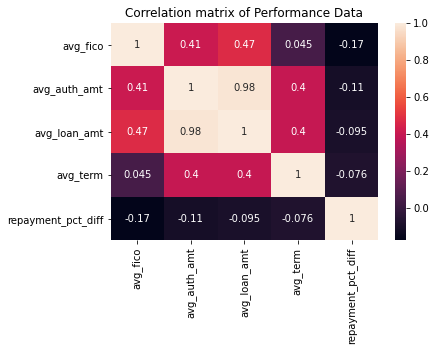

In [0]:
corr = df[['avg_fico','avg_auth_amt','avg_loan_amt','avg_term','repayment_pct_diff']].corr()
hm = sns.heatmap(corr, annot = True)
hm.set(title = "Correlation matrix of Performance Data")
plt.show()

### Category Data

In [0]:
category.info()
print("There are" ,category.duplicated().sum(), "duplicated record(s)")
# non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     143 non-null    object
 1   subcategory  143 non-null    object
 2   merchant_id  143 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 2.9+ KB
There are 0 duplicated record(s)


In [0]:
category['NAICS code_6'] = category['subcategory'].apply(lambda x : x[-6:])
category['NAICS code_3'] = category['NAICS code_6'].apply(lambda x : x[:3])
category['NAICS code_3'].unique()

Out[413]: array(['448', '442', '451', '611', '446', '441', '621', '425', '443',
       '517', '453', '561', '#N/', '238', '423', '444'], dtype=object)

In [0]:
category.head(10)

,category,subcategory,merchant_id,NAICS code_6,NAICS code_3
0,WOMENS_FASHION,Women's Clothing Stores - 448120,78986,448120,448
1,HOME_FURNISHINGS,Furniture Stores - 442110,54871,442110,442
2,#N/A,Women's Clothing Stores - 448120,86469,448120,448
3,OTHER,Musical Instrument and Supplies Stores - 451140,42719,451140,451
4,JEWELRY,Jewelry Stores - 448310,40242,448310,448
5,WOMENS_FASHION,Women's Clothing Stores - 448120,11801,448120,448
6,CONSUMER_ELECTRONICS,Elementary and Secondary Schools - 611110,25861,611110,611
7,WOMENS_FASHION,Clothing Accessories Stores - 448150,27822,448150,448
8,WOMENS_FASHION,Women's Clothing Stores - 448120,17371,448120,448
9,JEWELRY,Jewelry Stores - 448310,21004,448310,448


In [0]:
data = [("611", "Educational Services"),
       ("448", "Clothing and Clothing Accessories Stores"),
       ("442", "Furniture and home furnishings stores"),
       ("451", "Sporting Goods, Hobby, Book, and Music Stores"),
       ("446", "Health and Personal Care Stores"),
       ("441", "Motor Vehicle and Parts Dealers"),
       ("621", "Ambulatory Health Care Services"),
       ("425", "Wholesale Electronic Markets and Agents and Brokers subsector"),
       ("443", "Electronics and appliance stores"),
       ("517", "Telecommunications"),
       ("453", "Miscellaneous Store Retailers"),
       ("561", "Administrative and Support Services"),
       ("238", "Specialty trade contractors"),
       ("423", "Merchant Wholesalers, Durable Goods"),
       ("444", "Building Material and Garden Equipment and Supplies Dealers")]
NAICS_Code = pd.DataFrame(data, columns = ['NAICS code_3','Desc'])
category = pd.merge(category, NAICS_Code , how = 'left',on =['NAICS code_3'])
category

,category,subcategory,merchant_id,NAICS code_6,NAICS code_3,Desc
0,WOMENS_FASHION,Women's Clothing Stores - 448120,78986,448120,448,Clothing and Clothing Accessories Stores
1,HOME_FURNISHINGS,Furniture Stores - 442110,54871,442110,442,Furniture and home furnishings stores
2,#N/A,Women's Clothing Stores - 448120,86469,448120,448,Clothing and Clothing Accessories Stores
3,OTHER,Musical Instrument and Supplies Stores - 451140,42719,451140,451,"Sporting Goods, Hobby, Book, and Music Stores"
4,JEWELRY,Jewelry Stores - 448310,40242,448310,448,Clothing and Clothing Accessories Stores
...,...,...,...,...,...,...
138,OTHER,Sporting Goods Stores - 451110,45699,451110,451,"Sporting Goods, Hobby, Book, and Music Stores"
139,OTHER,Musical Instrument and Supplies Stores - 451140,57731,451140,451,"Sporting Goods, Hobby, Book, and Music Stores"
140,OTHER,All Other Health and Personal Care Stores - 44...,58894,446199,446,Health and Personal Care Stores
141,OTHER,#N/A,73545,#N/A,#N/,NaN


In [0]:
category.groupby(['category','subcategory', 'Desc']).agg(total = ('merchant_id','nunique'))

total 
 
 
 category 
 subcategory 
 Desc 
 
 
 
 
 
 #N/A 
 Electronics Stores - 443142 
 Electronics and appliance stores 
 1 
 
 
 Women's Clothing Stores - 448120 
 Clothing and Clothing Accessories Stores 
 1 
 
 
 AUTO_PARTS 
 Automotive Parts and Accessories Stores - 441310 
 Motor Vehicle and Parts Dealers 
 5 
 
 
 BEAUTY 
 Cosmetics, Beauty Supplies, and Perfume Stores - 446120 
 Health and Personal Care Stores 
 1 
 
 
 CONSUMER_ELECTRONICS 
 All Other Health and Personal Care Stores - 446199 
 Health and Personal Care Stores 
 1 
 
 
 Business to Business Electronic Markets - 425110 
 Wholesale Electronic Markets and Agents and Brokers subsector 
 3 
 
 
 Electronics Stores - 443142 
 Electronics and appliance stores 
 2 
 
 
 Elementary and Secondary Schools - 611110 
 Educational Services 
 1 
 
 
 Musical Instrument and Supplies Stores - 451140 
 Sporting Goods, Hobby, Book, and Music Stores 
 2 
 
 
 Wireless Telecommunications Carriers (except Satellite) - 517210 
 Telecommunications 
 1 
 
 
 HOME_FURNISHINGS 
 Electrical Contractors and Other Wiring Installation Contractors - 238210 
 Specialty trade contractors 
 1 
 
 
 Furniture Stores - 442110 
 Furniture and home furnishings stores 
 17 
 
 
 Hardware Stores - 444130 
 Building Material and Garden Equipment and Supplies Dealers 
 1 
 
 
 Other Building Material Dealers - 444190 
 Building Material and Garden Equipment and Supplies Dealers 
 1 
 
 
 JEWELRY 
 Jewelry Stores - 448310 
 Clothing and Clothing Accessories Stores 
 21 
 
 
 MENS_FASHION 
 Clothing Accessories Stores - 448150 
 Clothing and Clothing Accessories Stores 
 1 
 
 
 OTHER 
 All Other Health and Personal Care Stores - 446199 
 Health and Personal Care Stores 
 14 
 
 
 All Other Miscellaneous Schools and Instruction - 611699 
 Educational Services 
 1 
 
 
 Automotive Parts and Accessories Stores - 441310 
 Motor Vehicle and Parts Dealers 
 1 
 
 
 Business to Business Electronic Markets - 425110 
 Wholesale Electronic Markets and Agents and Brokers subsector 
 1 
 
 
 Clothing Accessories Stores - 448150 
 Clothing and Clothing Accessories Stores 
 3 
 
 
 Electronics Stores - 443142 
 Electronics and appliance stores 
 5 
 
 
 Furniture Stores - 442110 
 Furniture and home furnishings stores 
 2 
 
 
 Gift, Novelty, and Souvenir Stores - 453220 
 Miscellaneous Store Retailers 
 1 
 
 
 Hobby, Toy, and Game Stores - 451120 
 Sporting Goods, Hobby, Book, and Music Stores 
 3 
 
 
 Jewelry Stores - 448310 
 Clothing and Clothing Accessories Stores 
 6 
 
 
 Motorcycle, ATV, and All Other Motor Vehicle Dealers - 441228 
 Motor Vehicle and Parts Dealers 
 1 
 
 
 Musical Instrument and Supplies Stores - 451140 
 Sporting Goods, Hobby, Book, and Music Stores 
 10 
 
 
 Pet and Pet Supplies Stores - 453910 
 Miscellaneous Store Retailers 
 1 
 
 
 Professional and Management Development Training - 611430 
 Educational Services 
 1 
 
 
 Security Systems Services (except Locksmiths) - 561621 
 Administrative and Support Services 
 2 
 
 
 Service Establishment Equipment and Supplies Merchant Wholesalers - 423850 
 Merchant Wholesalers, Durable Goods 
 2 
 
 
 Shoe Stores - 448210 
 Clothing and Clothing Accessories Stores 
 1 
 
 
 Sporting Goods Stores - 451110 
 Sporting Goods, Hobby, Book, and Music Stores 
 10 
 
 
 Wireless Telecommunications Carriers (except Satellite) - 517210 
 Telecommunications 
 1 
 
 
 PERSONAL_SERVICE 
 All Other Miscellaneous Schools and Instruction - 611699 
 Educational Services 
 1 
 
 
 Offices of Dentists - 621210 
 Ambulatory Health Care Services 
 1 
 
 
 WOMENS_FASHION 
 Clothing Accessories Stores - 448150 
 Clothing and Clothing Accessories Stores 
 2 
 
 
 Luggage and Leather Goods Stores - 448320 
 Clothing and Clothing Accessories Stores 
 2 
 
 
 Women's Clothing Stores - 448120 
 Clothing and Clothing Accessories Stores 
 4

Correcttion 1: NAICS code_3 "611" beloings to "education service" which does not fall under any of these category , so classify to OTHER

In [0]:
category.loc[category['NAICS code_3'] == '611','category'] = 'OTHER'

In [0]:
subcategory = category.groupby(['subcategory']).agg(total_category = ('category','nunique')).reset_index().sort_values(['total_category'], ascending = False)
subcategory

,subcategory,total_category
0,#N/A,3
8,Electronics Stores - 443142,3
5,Clothing Accessories Stores - 448150,3
26,Wireless Telecommunications Carriers (except S...,2
17,Musical Instrument and Supplies Stores - 451140,2
1,All Other Health and Personal Care Stores - 44...,2
10,Furniture Stores - 442110,2
14,Jewelry Stores - 448310,2
27,Women's Clothing Stores - 448120,2
4,Business to Business Electronic Markets - 425110,2


In [0]:
weird_category_list1 = subcategory[subcategory['total_category'] != 1]['subcategory'].tolist() 
weird_category_list2 = category[category['category'] == '#N/A']['subcategory'].tolist()
weird_all = weird_category_list1 + list(set(weird_category_list2) - set(weird_category_list1))

In [0]:
li = []
for subcategory in weird_all:
  data = category[category['subcategory'] == subcategory]['category'].value_counts().reset_index()
  data['subcategory'] = subcategory
  data = data[['subcategory','index','category']]
  li.append(data)
weird_sub_category = pd.concat(li, axis=0, ignore_index=True)
weird_sub_category.columns = ['sub-category','category','count']
weird_sub_category['NAICS code_6'] = weird_sub_category['sub-category'].apply(lambda x : x[-6:])
weird_sub_category['NAICS code_3'] = weird_sub_category['NAICS code_6'].apply(lambda x : x[:3])
weird_df = pd.merge(weird_sub_category,NAICS_Code, on=['NAICS code_3'])
weird_df

,sub-category,category,count,NAICS code_6,NAICS code_3,Desc
0,Electronics Stores - 443142,OTHER,5,443142,443,Electronics and appliance stores
1,Electronics Stores - 443142,CONSUMER_ELECTRONICS,2,443142,443,Electronics and appliance stores
2,Electronics Stores - 443142,#N/A,1,443142,443,Electronics and appliance stores
3,Clothing Accessories Stores - 448150,OTHER,3,448150,448,Clothing and Clothing Accessories Stores
4,Clothing Accessories Stores - 448150,WOMENS_FASHION,2,448150,448,Clothing and Clothing Accessories Stores
5,Clothing Accessories Stores - 448150,MENS_FASHION,1,448150,448,Clothing and Clothing Accessories Stores
6,Jewelry Stores - 448310,JEWELRY,21,448310,448,Clothing and Clothing Accessories Stores
7,Jewelry Stores - 448310,OTHER,6,448310,448,Clothing and Clothing Accessories Stores
8,Women's Clothing Stores - 448120,WOMENS_FASHION,4,448120,448,Clothing and Clothing Accessories Stores
9,Women's Clothing Stores - 448120,#N/A,1,448120,448,Clothing and Clothing Accessories Stores


As can be seen from above table
* 'Automotive Parts and Accessories Stores - 441310' -> should belong to the group AUTO_PARTS
* 'Women's Clothing Stores - 448120' -> WOMENS_FASHION
* 'Furniture Stores - 442110'-> Furniture
* "Jewelry Stores - 448310" -> JEWELRY
* "All Other Health and Personal Care Stores - 446199" -> OTHER
* Musical Instrument and Supplies Stores - 451140 -> Other



The rest of the subcategory, I leave as it is because we need additional clarifying questions from my client

For example, Clothing Accessories Stores - 448150 can either be women_fashion or men_fashion, since we cannot be sure which "other" it belongs to, leave as it is
Additionally, Electronics Stores - 443142 with missing category is grouped into other category

In [0]:
# All Other Health and Personal Care Stores - 446199
category.loc[category['subcategory'] == "All Other Health and Personal Care Stores - 446199",'category'] = 'OTHER'
category.loc[category['subcategory'] == "Women's Clothing Stores - 448120",'category'] = 'WOMENS_FASHION'
category.loc[category['subcategory'] == "Automotive Parts and Accessories Stores - 441310",'category'] = 'AUTO_PARTS'
category.loc[category['subcategory'] == "Jewelry Stores - 448310",'category'] = 'JEWELRY'
category.loc[category['subcategory'] == "Furniture Stores - 442110",'category'] = 'HOME_FURNISHINGS'
category.loc[category['subcategory'] == "Musical Instrument and Supplies Stores - 451140",'category'] = 'OTHER'

In [0]:
category.loc[(category['subcategory'] == 'Electronics Stores - 443142')&(category['category'] == '#N/A'),'category'] = 'OTHER'

In [0]:
category.groupby(['category','subcategory']).agg(total = ('merchant_id','nunique'))

total 
 
 
 category 
 subcategory 
 
 
 
 
 
 AUTO_PARTS 
 Automotive Parts and Accessories Stores - 441310 
 6 
 
 
 BEAUTY 
 Cosmetics, Beauty Supplies, and Perfume Stores - 446120 
 1 
 
 
 CONSUMER_ELECTRONICS 
 #N/A 
 1 
 
 
 Business to Business Electronic Markets - 425110 
 3 
 
 
 Electronics Stores - 443142 
 2 
 
 
 Wireless Telecommunications Carriers (except Satellite) - 517210 
 1 
 
 
 HOME_FURNISHINGS 
 #N/A 
 1 
 
 
 Electrical Contractors and Other Wiring Installation Contractors - 238210 
 1 
 
 
 Furniture Stores - 442110 
 19 
 
 
 Hardware Stores - 444130 
 1 
 
 
 Other Building Material Dealers - 444190 
 1 
 
 
 JEWELRY 
 Jewelry Stores - 448310 
 27 
 
 
 MENS_FASHION 
 Clothing Accessories Stores - 448150 
 1 
 
 
 OTHER 
 #N/A 
 5 
 
 
 All Other Health and Personal Care Stores - 446199 
 15 
 
 
 All Other Miscellaneous Schools and Instruction - 611699 
 2 
 
 
 Business to Business Electronic Markets - 425110 
 1 
 
 
 Clothing Accessories Stores - 448150 
 3 
 
 
 Electronics Stores - 443142 
 6 
 
 
 Elementary and Secondary Schools - 611110 
 1 
 
 
 Gift, Novelty, and Souvenir Stores - 453220 
 1 
 
 
 Hobby, Toy, and Game Stores - 451120 
 3 
 
 
 Motorcycle, ATV, and All Other Motor Vehicle Dealers - 441228 
 1 
 
 
 Musical Instrument and Supplies Stores - 451140 
 12 
 
 
 Pet and Pet Supplies Stores - 453910 
 1 
 
 
 Professional and Management Development Training - 611430 
 1 
 
 
 Security Systems Services (except Locksmiths) - 561621 
 2 
 
 
 Service Establishment Equipment and Supplies Merchant Wholesalers - 423850 
 2 
 
 
 Shoe Stores - 448210 
 1 
 
 
 Sporting Goods Stores - 451110 
 10 
 
 
 Wireless Telecommunications Carriers (except Satellite) - 517210 
 1 
 
 
 PERSONAL_SERVICE 
 Offices of Dentists - 621210 
 1 
 
 
 WOMENS_FASHION 
 Clothing Accessories Stores - 448150 
 2 
 
 
 Luggage and Leather Goods Stores - 448320 
 2 
 
 
 Women's Clothing Stores - 448120 
 5

In [0]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      143 non-null    object
 1   subcategory   143 non-null    object
 2   merchant_id   143 non-null    int32 
 3   NAICS code_6  143 non-null    object
 4   NAICS code_3  143 non-null    object
 5   Desc          136 non-null    object
dtypes: int32(1), object(5)
memory usage: 11.3+ KB


In [0]:
df = pd.merge(df, category[['category','subcategory','merchant_id']], on = ['merchant_id'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         143 non-null    object 
 1   merchant_id                  143 non-null    int32  
 2   actual_repayment_pct         143 non-null    float64
 3   predicted_repayment_pct      143 non-null    float64
 4   num_trxn                     143 non-null    int32  
 5   avg_auth_amt                 143 non-null    float64
 6   avg_loan_amt                 143 non-null    float64
 7   avg_fico                     143 non-null    int32  
 8   avg_term                     143 non-null    int32  
 9   avg_apr                      143 non-null    float64
 10  predicted_default_rate       143 non-null    float64
 11  actual_default_rate          143 non-null    float64
 12  repayment_pct_diff           143 non-null    float64
 13  % loan used         

In [0]:
output = spark.createDataFrame(df)
output.write.format("csv").mode("overwrite").save("/FileStore/final_df.csv")

#### first question

* Based on the data, which categories generate the most profit for Company XYZ?

- women_fashion

In [0]:
q1_category_df = df.groupby(['category']).agg(total_profit = ('Profit','sum'), 
                                     total_merchant = ('merchant_id','nunique'), 
                                     total_transactions = ('num_trxn','sum'), 
                                     avg_fico_score = ('avg_fico','mean'), 
                                     total_sales = ('merchant_total_transactions','sum'),
                                     avg_merchant_discount_rev = ('merchant_discount_revenue','mean'),
                                     avg_customers_net_rev = ('consumer_net_revenue','mean'),
                                     repayment_pct_diff = ('repayment_pct_diff','mean'),
                                     number_of_merchant_loss = ('loss','sum')).sort_values(['total_profit'], ascending = False).reset_index()

q1_category_df[["total_profit","avg_fico_score","repayment_pct_diff","total_sales","avg_merchant_discount_rev","avg_customers_net_rev","repayment_pct_diff"]] = q1_category_df[["total_profit","avg_fico_score","repayment_pct_diff","total_sales","avg_merchant_discount_rev","avg_customers_net_rev","repayment_pct_diff"]].round(3)
q1_category_df

,category,total_profit,total_merchant,total_transactions,avg_fico_score,total_sales,avg_merchant_discount_rev,avg_customers_net_rev,repayment_pct_diff,number_of_merchant_loss
0,WOMENS_FASHION,112808.555,8,7140,657.625,3291167.279,8227.918,5873.151,0.012,2
1,OTHER,65044.786,71,2033,658.099,1678731.657,472.882,443.242,0.055,21
2,#N/A,56158.875,2,2680,684.000,1658732.046,16587.320,11492.117,0.001,0
3,HOME_FURNISHINGS,46825.397,21,3686,673.857,3423051.080,3260.049,-1030.268,-0.023,3
4,CONSUMER_ELECTRONICS,13294.275,11,430,650.182,232034.528,421.881,786.690,-0.001,2
5,JEWELRY,12786.225,21,844,653.381,522119.598,497.257,111.611,-0.023,6
6,PERSONAL_SERVICE,10428.887,2,109,694.000,127659.356,1276.594,3937.850,-0.019,0
7,MENS_FASHION,178.118,1,10,679.000,3890.595,77.812,100.306,-0.046,0
8,AUTO_PARTS,-100.395,5,215,652.400,156871.446,627.486,-647.565,0.047,3
9,BEAUTY,-868.833,1,50,616.000,6889.520,137.790,-1006.623,0.140,1


In [0]:
q1_subcategory_df = df.groupby(['subcategory']).agg(total_profit = ('Profit','sum'), 
                                     total_merchant = ('merchant_id','nunique'), 
                                     total_transactions = ('num_trxn','sum'), 
                                     avg_fico_score = ('avg_fico','mean'), 
                                     total_sales = ('merchant_total_transactions','sum'),
                                     avg_merchant_discount_rev = ('merchant_discount_revenue','mean'),
                                     avg_customers_net_rev = ('consumer_net_revenue','mean'),
                                     repayment_pct_diff = ('repayment_pct_diff','mean'),
                                     number_of_merchant_loss = ('loss','sum')).sort_values(['total_profit'], ascending = False).reset_index()

q1_subcategory_df[["total_profit","avg_fico_score","repayment_pct_diff","total_sales","avg_merchant_discount_rev","avg_customers_net_rev","repayment_pct_diff"]] = q1_subcategory_df[["total_profit","avg_fico_score","repayment_pct_diff","total_sales","avg_merchant_discount_rev","avg_customers_net_rev","repayment_pct_diff"]].round(3)
q1_subcategory_df

,subcategory,total_profit,total_merchant,total_transactions,avg_fico_score,total_sales,avg_merchant_discount_rev,avg_customers_net_rev,repayment_pct_diff,number_of_merchant_loss
0,Women's Clothing Stores - 448120,163560.669,5,9506,655.800,4824295.331,19297.181,13414.953,0.029,1
1,Musical Instrument and Supplies Stores - 451140,51650.461,12,831,659.750,606449.555,1010.749,3293.456,-0.018,1
2,Furniture Stores - 442110,44270.242,19,3677,675.474,3403729.516,3582.873,-1252.860,-0.026,3
3,Jewelry Stores - 448310,15150.126,27,878,652.778,544128.328,403.058,158.058,-0.031,6
4,Offices of Dentists - 621210,8941.257,1,107,680.000,119823.356,2396.467,6544.790,-0.006,0
5,Shoe Stores - 448210,8820.463,1,141,638.000,96085.403,1921.708,6898.755,-0.007,0
6,Business to Business Electronic Markets - 425110,7728.438,4,83,658.750,97432.486,487.162,1444.947,-0.024,0
7,Luggage and Leather Goods Stores - 448320,7358.561,2,81,672.500,80706.452,807.065,2872.216,-0.017,0
8,All Other Health and Personal Care Stores - 44...,6924.791,15,602,662.533,452723.796,603.632,-141.979,0.145,7
9,Electronics Stores - 443142,3805.685,8,117,662.625,128612.628,321.532,154.179,0.005,1


What merchant pricing strategy will you come out to increase/decrease MDR for better overall profitability? You can use public information as well, if needed.

In [0]:
My proposed merchant pricing strategy : increase MDR

Base: MDR by category/industry

We need to charge different MDR by industry. We will assess the industry by 
* General risk of the industry
* Annual credit selling volumes

For industry that has high average selling volumnes, we have charge  MDR, but higher MDR for industry that has lower volumes. 
For example, for WOMENS_FASHION, since the total sales is higher, 


Tiered pricing factor - risky of the industry

We can study the average FICO score and default rate by industry, and determine the risk of each industry. 
To be more specific, for example, for HOME_FURNISHINGS and auto parts, the avg_cusomer_net_rev is negative, which means that we're losing money from the consumer side, so in order to increase or maintain our profitability, 
we need to increase MDR rate, so I propose we can
